In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense 
from tensorflow.keras import Sequential 
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from neural_network_N_layers import Model, Layer

# Load MNIST data and preprocess them 

### --> Image data are normalized to speed up convergence and also to avoid Exploding Gradients

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Analysis of class proportion in test data

labels, counts = np.unique(y_test,return_counts=True)

np.asarray((labels, counts)).T

array([[   0,  980],
       [   1, 1135],
       [   2, 1032],
       [   3, 1010],
       [   4,  982],
       [   5,  892],
       [   6,  958],
       [   7, 1028],
       [   8,  974],
       [   9, 1009]], dtype=int64)

In [4]:
X_train = X_train/255
X_test = X_test/255

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Comparison of Tensorflow model versus our model (Basic configuration)

### Below: Results show similar performance between our model and Tensorflow API

In [5]:
def nn_model():

    tf.random.set_seed(42)

    model2 = Sequential([
        Dense(512,input_shape=(784,),activation='relu'),
        Dense(128,activation='relu'),
        Dense(64,activation='relu'),
        Dense(10,activation='softmax')
    ])

    model2.compile(optimizer=SGD(learning_rate=0.05),
                  loss="categorical_crossentropy",
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])
    
    return model2

In [6]:
model2 = nn_model()

In [7]:
model2.fit(X_train,
           y_train,
           batch_size=512,
           epochs=20)

Epoch 1/20
118/118 [==============================] - 2s 12ms/step - loss: 1.1135 - categorical_accuracy: 0.7175
Epoch 2/20
118/118 [==============================] - 1s 11ms/step - loss: 0.3977 - categorical_accuracy: 0.8901
Epoch 3/20
118/118 [==============================] - 1s 12ms/step - loss: 0.3161 - categorical_accuracy: 0.9106
Epoch 4/20
118/118 [==============================] - 1s 12ms/step - loss: 0.2768 - categorical_accuracy: 0.9200
Epoch 5/20
118/118 [==============================] - 1s 12ms/step - loss: 0.2499 - categorical_accuracy: 0.9294
Epoch 6/20
118/118 [==============================] - 1s 11ms/step - loss: 0.2285 - categorical_accuracy: 0.9352
Epoch 7/20
118/118 [==============================] - 1s 12ms/step - loss: 0.2103 - categorical_accuracy: 0.9401
Epoch 8/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1946 - categorical_accuracy: 0.9439
Epoch 9/20
118/118 [==============================] - 1s 12ms/step - loss: 0.1800 - categorical_

In [8]:
model = Model([Layer(units=512,input_units=784, activation='relu'),
               Layer(units=128, activation='relu'),
               Layer(units=64, activation='relu'),
               Layer(units=10, activation='softmax')], 
               random_state=21)

In [9]:
model.fit(X_train,y_train,batch_size=512,epochs=20,learning_rate=0.05)

Epoch 1 - Train_Loss:0.4683886309651992
Epoch 2 - Train_Loss:0.31217961195062416
Epoch 3 - Train_Loss:0.26148313598202866
Epoch 4 - Train_Loss:0.233974659029999
Epoch 5 - Train_Loss:0.2137232903312077
Epoch 6 - Train_Loss:0.19724466442802732
Epoch 7 - Train_Loss:0.1833528268356622
Epoch 8 - Train_Loss:0.1717879057939811
Epoch 9 - Train_Loss:0.16231448543756266
Epoch 10 - Train_Loss:0.1545120856793933
Epoch 11 - Train_Loss:0.1476000920160099
Epoch 12 - Train_Loss:0.1410046931729924
Epoch 13 - Train_Loss:0.13461325935734064
Epoch 14 - Train_Loss:0.12858783895821316
Epoch 15 - Train_Loss:0.12246521868484107
Epoch 16 - Train_Loss:0.11756355950868747
Epoch 17 - Train_Loss:0.11191434565178321
Epoch 18 - Train_Loss:0.10655983041728932
Epoch 19 - Train_Loss:0.10161816889915047
Epoch 20 - Train_Loss:0.09668518350939326


{'W1': array([[-0.00262459, -0.00561625,  0.05261868, ..., -0.01568284,
          0.0013163 ,  0.02026696],
        [ 0.05716081,  0.01618049, -0.01536341, ..., -0.07747119,
         -0.11543507, -0.06082131],
        [-0.0457258 , -0.03152732,  0.05233155, ..., -0.05977287,
          0.07191344,  0.03343761],
        ...,
        [-0.00974497, -0.00753957,  0.01508525, ..., -0.06515899,
          0.0028658 , -0.02683527],
        [ 0.00042607,  0.0199444 , -0.01213387, ...,  0.03924506,
          0.01719791,  0.01419433],
        [ 0.11971672,  0.03460916,  0.04479944, ...,  0.00154667,
          0.01376039,  0.0169571 ]]),
 'b1': array([[ 1.87545626e-02],
        [-1.60434001e-03],
        [ 2.51760400e-04],
        [ 8.30431093e-04],
        [ 1.08692890e-03],
        [ 5.13156497e-03],
        [ 8.12955984e-03],
        [ 3.54616826e-04],
        [ 2.15614756e-03],
        [-2.20381789e-02],
        [ 6.41832326e-04],
        [ 5.64854497e-03],
        [ 1.15491103e-02],
        [-

In [10]:
pred = np.where(model.predict(X_test)==1)[1]
pred2 = np.argmax(model2.predict(X_test),axis=1)
test = np.where(y_test==1)[1]

In [11]:
print(classification_report(test,pred2,digits=4))

              precision    recall  f1-score   support

           0     0.9826    0.9776    0.9801       980
           1     0.9833    0.9859    0.9846      1135
           2     0.9867    0.9351    0.9602      1032
           3     0.9841    0.9208    0.9514      1010
           4     0.9637    0.9725    0.9681       982
           5     0.9154    0.9821    0.9475       892
           6     0.9518    0.9687    0.9602       958
           7     0.9392    0.9767    0.9576      1028
           8     0.9424    0.9569    0.9496       974
           9     0.9695    0.9445    0.9568      1009

    accuracy                         0.9620     10000
   macro avg     0.9619    0.9621    0.9616     10000
weighted avg     0.9627    0.9620    0.9620     10000



In [12]:
print(classification_report(test,pred,digits=4))

              precision    recall  f1-score   support

           0     0.9747    0.9816    0.9781       980
           1     0.9833    0.9841    0.9837      1135
           2     0.9671    0.9690    0.9681      1032
           3     0.9702    0.9683    0.9693      1010
           4     0.9687    0.9756    0.9721       982
           5     0.9464    0.9709    0.9585       892
           6     0.9799    0.9666    0.9732       958
           7     0.9639    0.9601    0.9620      1028
           8     0.9607    0.9528    0.9567       974
           9     0.9618    0.9495    0.9556      1009

    accuracy                         0.9680     10000
   macro avg     0.9677    0.9678    0.9677     10000
weighted avg     0.9680    0.9680    0.9680     10000



# Testing our model again with:
### 1) Early Stopping on Development Set
### 2) L2 Regularization

### Below: Macro average F1 and confusion matrix show superior results compared to previous run!

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,random_state=42,stratify=y_train)

In [15]:
model = Model([Layer(units=512,input_units=784, activation='relu',l2_regularization=0.01),
               Layer(units=128, activation='relu',l2_regularization=0.005),
               Layer(units=64, activation='relu'),
               Layer(units=10, activation='softmax')], 
               random_state=21)

In [16]:
model.fit(X_train,
          y_train,
          validation_data=(X_val,y_val),
          batch_size=512,
          epochs=100,
          learning_rate=0.05,
          patience=5)

Epoch 1 - Train_Loss:0.4478347954309386  Val_Loss:0.5088646326323709
Epoch 2 - Train_Loss:0.2868174108647129  Val_Loss:0.3458644697761199
Epoch 3 - Train_Loss:0.23943198069406862  Val_Loss:0.29475559592421935
Epoch 4 - Train_Loss:0.21197391221527997  Val_Loss:0.26401229075167354
Epoch 5 - Train_Loss:0.19176638334439566  Val_Loss:0.24194741182349794
Epoch 6 - Train_Loss:0.17607525143522376  Val_Loss:0.22474368739152614
Epoch 7 - Train_Loss:0.16307335469999765  Val_Loss:0.2106636735647611
Epoch 8 - Train_Loss:0.15186585898780267  Val_Loss:0.19894035628826376
Epoch 9 - Train_Loss:0.14199683348666853  Val_Loss:0.18907221516052014
Epoch 10 - Train_Loss:0.1335541993761417  Val_Loss:0.18034670593137359
Epoch 11 - Train_Loss:0.12609504944357877  Val_Loss:0.17268903217344309
Epoch 12 - Train_Loss:0.1194655594921464  Val_Loss:0.16583376535712266
Epoch 13 - Train_Loss:0.11337302170728758  Val_Loss:0.15968971816979907
Epoch 14 - Train_Loss:0.10761410898821522  Val_Loss:0.15401738321823757
Epoch 15

{'W1': array([[-0.00260706, -0.00557873,  0.05226713, ..., -0.01557806,
          0.00130751,  0.02013155],
        [ 0.05677891,  0.01607238, -0.01526077, ..., -0.07695359,
         -0.11466382, -0.06041495],
        [-0.04542029, -0.03131668,  0.05198191, ..., -0.05937351,
          0.07143297,  0.03321421],
        ...,
        [-0.00967986, -0.00748919,  0.01498446, ..., -0.06472365,
          0.00284666, -0.02665598],
        [ 0.00042323,  0.01981114, -0.0120528 , ...,  0.03898286,
          0.01708301,  0.01409949],
        [ 0.11891687,  0.03437792,  0.04450013, ...,  0.00153633,
          0.01366845,  0.01684381]]),
 'b1': array([[ 2.48117910e-02],
        [-3.00336029e-03],
        [-8.08151032e-03],
        [-8.56055939e-03],
        [ 1.18782880e-02],
        [-1.40430997e-03],
        [ 9.35989946e-03],
        [ 3.00601633e-03],
        [ 8.78837487e-03],
        [-2.70863570e-02],
        [ 2.49160090e-02],
        [ 1.04402729e-02],
        [ 1.62857621e-02],
        [-

In [17]:
pred = np.where(model.predict(X_test)==1)[1]
test = np.where(y_test==1)[1]
print(classification_report(test,pred,digits=4))

              precision    recall  f1-score   support

           0     0.9806    0.9796    0.9801       980
           1     0.9903    0.9903    0.9903      1135
           2     0.9602    0.9806    0.9703      1032
           3     0.9536    0.9772    0.9653      1010
           4     0.9827    0.9807    0.9817       982
           5     0.9715    0.9563    0.9638       892
           6     0.9863    0.9739    0.9800       958
           7     0.9784    0.9698    0.9741      1028
           8     0.9662    0.9682    0.9672       974
           9     0.9729    0.9623    0.9676      1009

    accuracy                         0.9743     10000
   macro avg     0.9743    0.9739    0.9740     10000
weighted avg     0.9744    0.9743    0.9743     10000



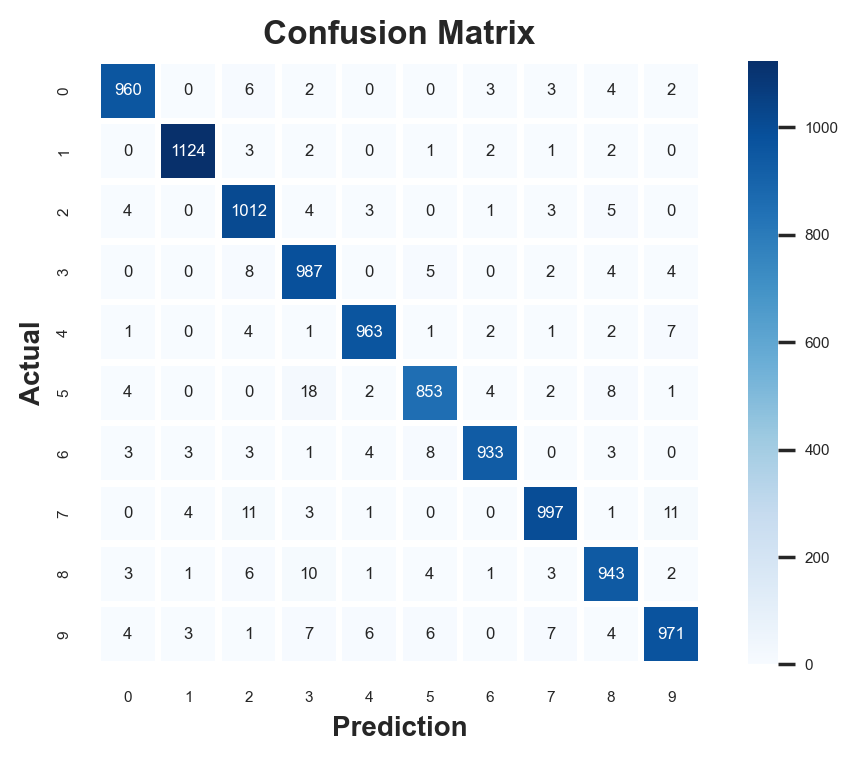

In [18]:
def make_confusion_matrix(y_test,y_predict):  
    
    confusion = confusion_matrix(y_test,y_predict)
    
    sns.set(style='white',font_scale=0.5)
    plt.figure(dpi=200)
    ax = sns.heatmap(confusion, cmap='Blues', annot=True, square=True, fmt='d',linewidth=2);   
    plt.xlabel('Prediction',weight='bold',fontsize=10)
    plt.ylabel('Actual',weight='bold',fontsize=10)
    plt.title('Confusion Matrix',weight='bold',fontsize=12)
    
make_confusion_matrix(test,pred)